In [97]:
## This code will analyze dump from the executable
import matplotlib.pyplot as plt
from collections import OrderedDict
from collections import defaultdict
import math
import numpy as np

In [98]:
## Create the tree dictionary for a given file

def createTreeDict(fileName):
    count = 0
    myGraph = {}
    myParent = {}
    with open(fileName) as file:
            for line in file:
                if "[GM] Created a new state" in line:
                    count += 1
                    spLine = line.split(",")
                    p = spLine[2].strip().split(":")[1]
                    c = spLine[1].strip().split(":")[1]
                    if p not in myGraph:
                        myGraph[p] = set()
                    if p not in myParent:
                        myParent[p] = set()
                    if c not in myGraph:
                        myGraph[c] = set()
                    if c not in myParent:
                        myParent[c] = set()

                    myGraph[c].add(p)
                    myParent[p].add(c)
    print("Number of Nodes: ",count)
    return myGraph,myParent

## Get the root Node of the graph
def find_roots(data):
    all_children = {child for children in data.values() for child in children}
    return [key for key in data.keys() if key not in all_children]

def nodeCountwithChildren(graph):
    return len(graph.keys())

def childDistribution(graph): ## Provides the number of node per child count
    child_count = {}
    ## Analyze the child count
    for key in graph.keys():
        ch_Count = len(graph[key])
        if ch_Count not in child_count:
            child_count[ch_Count] = 0
        child_count[ch_Count] += 1
    ch_c = OrderedDict(sorted(child_count.items()))
    return ch_c

    
def parentDistribution(parent_graph):  ## Provides the number of node per parent count
    parent_count = {}
    ## Analyze the child count
    for key in parent_graph.keys():
        ch_Count = len(parent_graph[key])
        if ch_Count not in parent_count:
            parent_count[ch_Count] = 0
        parent_count[ch_Count] += 1
    # parent_count
    ph_c = OrderedDict(sorted(parent_count.items()))
    return ph_c

def printDistributionGraph(distr):
    my_str = ""
    for key in distr:
        my_str += f" {key}->{distr[key]} ::"
    print("Distribution "+my_str)
    return


def node_per_level(graph):
   
    node_level = {}
    count_node_level = defaultdict(int)

    rootNode = find_roots(graph)[0]

    def populateParent(myGraph,node,myLevel=0):
        if node not in node_level:
            node_level[node] = myLevel
            count_node_level[myLevel] += 1
        for child in myGraph[node]:
            populateParent(myGraph,child,myLevel+1)
        return
    populateParent(graph,rootNode,0)
    node_level_dist = OrderedDict(sorted(count_node_level.items(),reverse=True))
    return node_level_dist,node_level



def plot_parent_collision(parent_distr,title="Parent Collision"):
    n_parent = []
    n_node = []

    for key in parent_distr:
        n_parent.append(key)
        n_node.append(parent_distr[key])


    plt.plot(n_parent,n_node)
    plt.xlabel("Number of parents (# Collision)")
    plt.ylabel("Number of nodes")
    plt.title(title)
    plt.show()
    return

def plot_child_collision(child_distr,title="Child Distribution"):
    n_child = []
    n_node = []

    for key in child_distr:
        n_child.append(key)
        n_node.append(child_distr[key])


    plt.plot(n_child,n_node)
    plt.xlabel("Number of child")
    plt.ylabel("Number of nodes")
    plt.title(title)
    plt.show()
    return

def plot_node_level_distribution(node_level_dist,title="Nodes at each level"):    
    x = node_level_dist.keys()
    # ns = np.arange(1,11)
    vals = [node_level_dist[k] for k in node_level_dist.keys() ]
    nvals = [-node_level_dist[k] for k in node_level_dist.keys() ]
    mval = min(nvals)
    # print(max(vals))

    # xtickV = [abs(mval)+t for t in tickVal]

    # for n in ns:
    plt.fill_betweenx(x, nvals, vals, color="C0", alpha=0.5)
    xticks = plt.gca().get_xticks()
    # constant_value = 5
    # new_xticks = xticks + abs(mval)
    plt.xticks(xticks, labels=[f'{abs(int(tick))}' for tick in xticks])
    plt.gca().invert_yaxis()
    # plt.xlim(left=-108.5,right=110)
    plt.xlabel("Amount of nodes")
    plt.ylabel("Node Level")
    # plt.xticks(xtickV)
    # plt.xticks(ns)
    plt.title(title)
    plt.show() 
    return


def scaling_time(node_per_level, n=1):
    tot_basic = 0
    for key in node_per_level:
        tot_basic += node_per_level[key]
    
    tot_scaled = 0
    for key in node_per_level:
        tot_scaled += math.ceil(node_per_level[key]/n)
    
    return tot_basic/tot_scaled

def plot_scaling_benefit(node_level_dist,max_core=250):
    x = []
    y = []
    for ix in range(1,max_core):
        x.append(ix)
        y.append(scaling_time(node_level_dist,ix))
    plt.plot(x,y)
    plt.xlabel("Number of cores")
    plt.ylabel("Performance Scaling")
    plt.title("Theoretical Improvement of MAUDE ")
    plt.show()
    return


In [99]:
FILE_EVALUATED = "TraceBank-T2.txt" ## Change file to study

In [101]:
myGraph,myParent = createTreeDict(FILE_EVALUATED)
rootNode = find_roots(myGraph)[0]# Assuming it has one node for general MAUDE. Note: MAUDE-NPA will have different behaviour
myGraph[rootNode]

Number of Nodes:  1632


{'1001248288147055930',
 '12498662836822447034',
 '14741028695232287396',
 '15465925069674478135',
 '17221037162903479674',
 '473686884182430523',
 '6321892627716298568',
 '8675405696551876505',
 '9542668905756349371'}

In [102]:
child_distribution = childDistribution(myGraph)

In [103]:
parent_distribution = parentDistribution(myParent)

In [87]:
printDistributionGraph(parent_distribution)

Distribution  0->1 :: 1->20 :: 2->97 :: 3->191 :: 4->170 :: 5->33 ::


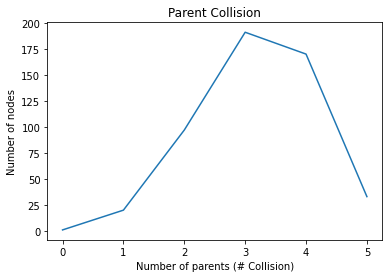

In [120]:
plot_parent_collision(parent_distribution,title="Parent Collision")

In [121]:
printDistributionGraph(child_distribution)

Distribution  0->24 :: 1->64 :: 2->110 :: 3->112 :: 4->87 :: 5->58 :: 6->33 :: 7->17 :: 8->6 :: 9->1 ::


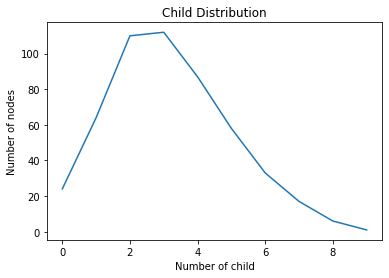

In [122]:
plot_child_collision(child_distribution,title="Child Distribution")

In [108]:
node_level_dist,node_level = node_per_level(myGraph)

In [117]:
node_level_dist ## 0 is the root, and higher

OrderedDict([(9, 1),
             (8, 9),
             (7, 36),
             (6, 84),
             (5, 126),
             (4, 126),
             (3, 84),
             (2, 36),
             (1, 9),
             (0, 1)])

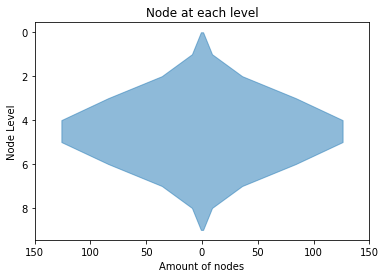

In [118]:
plot_node_level_distribution(node_level_dist, title="Node at each level")

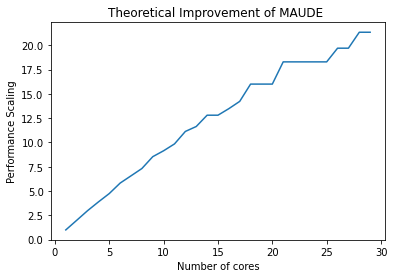

In [119]:
plot_scaling_benefit(node_level_dist,max_core=30)

# To print the actual tree structure 
### commented out as it breaks jupter-notebook remote

In [82]:
# from anytree import Node, RenderTree
# from anytree.exporter import DotExporter

# # Sample dictionary of lists with multiple roots


# # Function to find all nodes that are roots (i.e., they don't appear as children anywhere)
# def find_roots(data):
#     all_children = {child for children in data.values() for child in children}
#     return [key for key in data.keys() if key not in all_children]

# # Recursive function to build each tree from its root
# def build_tree(node_name, parent=None):
#     node = Node(node_name, parent=parent)
#     for child in myGraph.get(node_name, []):
#         build_tree(child, node)
#     return node

# # Find all root nodes
# roots = find_roots(myGraph)
# print("Root Node: ", roots,"\n")

# # Build and visualize each tree
# for root_name in roots:
#     root_node = build_tree(root_name)
#     print(f"Tree for {root_name}:")
#     for pre, fill, node in RenderTree(root_node):
#         print(f"{pre}{node.name}")
#     print()  # Separate trees visually

#     # Optionally, export each tree as an image
# #     DotExporter(root_node).to_picture(f"{root_name}_tree.png")

